# Probability

### Conditional Probability

In [ ]:
import random , enum
# An Enum is a typed set of enumerated values. 
class KID(enum.Enum):
    BOY = 0
    GIRL = 1

def random_kid() -> KID:
    return random.choice([KID.BOY, KID.GIRL])

both_girls = 0
older_girls = 0
either_girls = 0

random.seed(0)
for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == KID.GIRL:
        older_girls += 1
    if older == KID.GIRL and younger == KID.GIRL:
        both_girls += 1
    if older == KID.GIRL or younger == KID.GIRL:
        either_girls += 1

print("P(both | older)", both_girls / older_girls)
print("P(both | either)", both_girls / either_girls)


# Continuous random variable
def uniform_pdf(x:float)-> float:
    return 1 if 0 <= x < 1 else 0 

# Cumulative distribution function
def uniform_cdf(x:float) -> float:
    ''' Returns the probability that a uniform random variable is <=x '''
    if x < 0: return 0     # uniform random is never less than 0
    elif x < 1: return x   # e.g. P(X <= 0.4) = 0.4
    else:    return 1       # unform random is always less than 1  


### Continuous random variable

In [ ]:
def uniform_pdf(x:float)-> float:
    return 1 if 0 <= x < 1 else 0 

###  Cumulative distribution function

In [ ]:
def uniform_cdf(x:float) -> float:
    ''' Returns the probability that a uniform random variable is <=x '''
    if x < 0: return 0     # uniform random is never less than 0
    elif x < 1: return x   # e.g. P(X <= 0.4) = 0.4
    else:    return 1       # unform random is always less than 1  

#### Normal Distribution

In [5]:
import math 
SQRT_TWO_PI = math.sqrt(2*math.pi)

def normal_pdf(x: float, mu:float = 0, sigma:float = 1)-> float:
    return(math.exp(-(x-mu)**2/2/sigma**2)/(SQRT_TWO_PI))

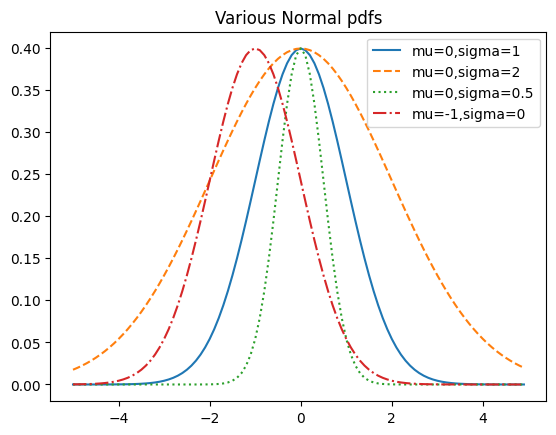

In [11]:
import matplotlib.pyplot as plt
xs = [x/10.0  for x in range(-50,50)]
plt.plot(xs,[normal_pdf(x,sigma=1)for x in xs],'-', label='mu=0,sigma=1')
plt.plot(xs,[normal_pdf(x,sigma=2)for x in xs],'--', label='mu=0,sigma=2')
plt.plot(xs,[normal_pdf(x,sigma=0.5)for x in xs],':', label='mu=0,sigma=0.5')
plt.plot(xs,[normal_pdf(x,mu=-1)for x in xs],'-.', label='mu=-1,sigma=0')
plt.legend()
plt.title("Various Normal pdfs")
plt.show()

### Cumulative Distribution Function

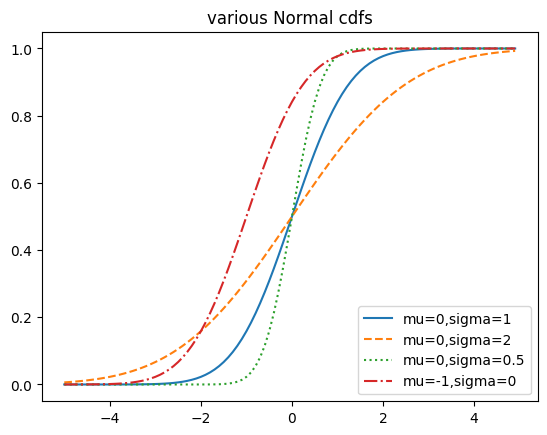

In [17]:
# The CDF for the normal distribution cannot be written in an "elementary" manner, but we can write it using python's math.erf error function

def normal_cdf(x:float, mu:float = 0, sigma:float =1)->float:
    return (1+math.erf((x-mu)/math.sqrt(2)/sigma))/2

xs = [x/10.0 for x in range(-50,50)]
plt.plot(xs,[normal_cdf(x,sigma=1) for x in xs],'-',label='mu=0,sigma=1')
plt.plot(xs,[normal_cdf(x,sigma=2) for x in xs],'--',label='mu=0,sigma=2')
plt.plot(xs,[normal_cdf(x,sigma=0.5) for x in xs],':',label='mu=0,sigma=0.5')
plt.plot(xs,[normal_cdf(x,mu=-1) for x in xs],'-.',label='mu=-1,sigma=0')
plt.legend(loc=4) #botton right
plt.title("various Normal cdfs")
plt.show()


In [18]:
# Sometimes we'll need to invert normal_cdf to find the value corresponding to a specified probability. There's no simple way to compute its inverse, but normal_cdf is continuous and strictly increasing, so we can use a binary search:

def inverse_normal_cdf(p:float,
                       mu:float = 0,
                       sigma:float =1,
                       tolerence:float = 0.00001)->float:
    """ Find approximate inverse using binary search """
    # if not standard, compute standard and rescale
    if mu!=0 or sigma != 1:
        return mu+ sigma*inverse_normal_cdf(p, tolerence=tolerence)
    low_z=-10.0                   # normal_cdf(-10) is (very close to) 0
    hi_z = 10.0                   # normal_cdf(10) is (very close to) 1
    while hi_z - low_z > tolerence:
        mid_z = (low_z+hi_z)/2                # consider the midpoint
        mid_p = normal_cdf(mid_z)             # the CDF's value there
        if mid_p < p:
            low_z = mid_z                     # midpoint too low search above it
        else:
            hi_z = mid_z                      # midpoint too high, search below it
    return mid_z


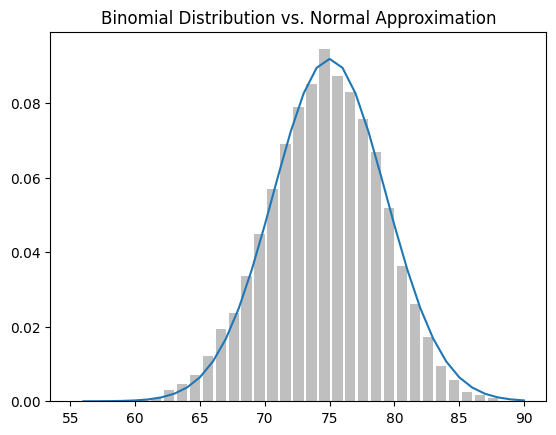

In [21]:
""" An easy way to illustrate this is by looking at binomial random variables, which have two parameters n and p. A Binomial(n,p) random variable is simply the sum of n independent Bernoulli(p) random variables, each of which equals 1 with probability p and 0 with probability 1-p """

import random

def bernoulli_trial(p:float)->int:
    """ Retunrs 1 with probability p and 0 with probability 1-p """
    return 1 if random.random() < p else 0

def binomial(n: int, p:float)-> int:
    """ Return the sum of n bernoulli(p) trials """
    return sum(bernoulli_trial(p) for _ in range(n)) 

""" The mean of a Bernoulli(p) variable is p, and its standard deviation is sqrt(p(1-p)). The central limit theorem says that as n gets large, a Binomial(n,p) variable is approximately a normal random varible with mean(µ) = np and standard deviation = sqrt(np(1-p)). """

from collections import Counter

def binomial_histogram(p:float,n:int,num_points:int)->None:
    data = [binomial(n,p) for _ in range(num_points)]

    histogram = Counter(data)
    plt.bar([x-0.4 for x in histogram.keys()],
            [v/num_points for v in histogram.values()],0.8,color='0.75')
    
    mu = p * n
    sigma = math.sqrt(n*p*(1-p))

    # line chart to show the normal approximation
    xs = range(min(data),max(data)+1)
    ys = [normal_cdf(i+0.5,mu,sigma)-normal_cdf(i-0.5,mu,sigma) for i in xs]
    plt.plot(xs,ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()
            
binomial_histogram(0.75, 100, 10000)

